In [1]:
#Load Modules
from pandas import read_csv
from numpy import ones, zeros, append, linspace, reshape, mean ,std, sum, array, dot
from pylab import plot, scatter, xlabel, ylabel, contour,figure, show, axes, title
from scipy.optimize import fmin_bfgs
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#load the data from a .txt file and observed first 5 examples
dataFrame = read_csv('data/data2.txt', names = ['Size','# of Bedrooms','Price'])
print dataFrame[:5]

   Size  # of Bedrooms   Price
0  2104              3  399900
1  1600              3  329900
2  2400              3  369000
3  1416              2  232000
4  3000              4  539900


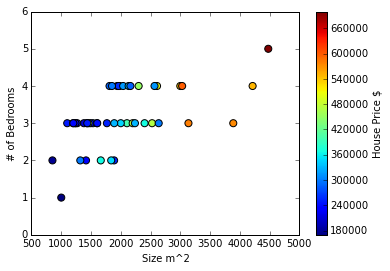

In [3]:
#Pass data to a matrix
x = dataFrame.as_matrix(columns = ['Size','# of Bedrooms'])
y = dataFrame.as_matrix(columns = ['Price'])

#Plot data, the color represents the 
sc = scatter(x[:,0],x[:,1], c = y, s= 50)
cb = colorbar(sc)
cb.ax.set_ylabel('House Price $')
xlabel('Size m^2')
ylabel('# of Bedrooms')

#Make global variables that will be use often
global m,n
m = x.shape[0]
n = x.shape[1]+1

#make initial theta as an array of 1D
inTheta = zeros(n)

In [4]:
#Function that normalizes the data to match unit scales
def normalizeData(x):
    mu = mean(x,axis=0)
    sigma = std(x,axis=0)
    x = (x-mu)/sigma
    x = append(ones((m,1)),x,axis=1)
    return (x,mu,sigma)

#Function that we want minimized
def costFunction(theta,x,y):
    theta = reshape(theta,(n,1))
    pred = dot(x,theta)
    J = mean((pred - y)**2)/2
    return J

#Gradient of costFunction
def gradient(theta,x,y):
    theta = reshape(theta,(n,1))
    pred = dot(x,theta)
    grad = dot(x.T,pred-y)/m
    return grad.flatten()

#Prediction for data x using parameters theta
def prediction(theta,x,mu=0,sigma=1):
    theta = reshape(theta,(n,1))
    x.shape = (1,x.shape[0])
    x = (x-mu)/sigma
    x = append(ones((x.shape[0],1)),x,axis=1)
    pred = dot(x,theta)
    return pred

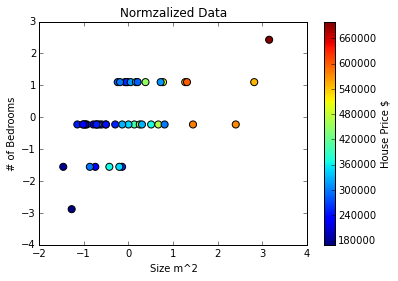

In [5]:
#Normalize data and print it
X,mu,sigma = normalizeData(x)
sc = scatter(X[:,1],X[:,2], c = y, s = 50)
cb = colorbar(sc)
cb.ax.set_ylabel('House Price $')
xlabel('Size m^2')
ylabel('# of Bedrooms')
title('Normzalized Data')

The fitting parameters that minimize the costFunction are:
[ 340412.65957497  109447.79646888   -6578.35485452]
The plot shows the evolution of the costFunction. This plot should decrease on every iteration.


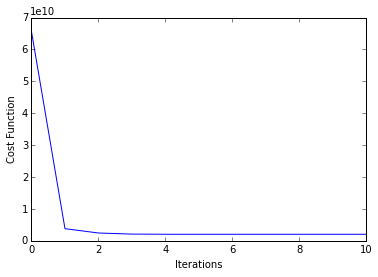

In [6]:
#Perform the minimization of the costFunction with the use of its gradient
theta, theta_i = fmin_bfgs(costFunction,inTheta,fprime = gradient,args=(X,y),retall = 1, disp = 0)

#Calculate the evolution of the costFunction with every iteration
J = zeros(len(theta_i))
for i,th in enumerate(theta_i):
    J[i] = costFunction(th,X,y)
    
plot(range(J.size),J)
xlabel('Iterations')
ylabel('Cost Function')

print 'The fitting parameters that minimize the costFunction are:'
print theta
print 'The plot shows the evolution of the costFunction. This plot should decrease on every iteration.'

For a size of 1650 and 3 we expect a price of 293081.464336
Data is plotted to check sanity of our prediction. Predictino is shown with an hexagon.


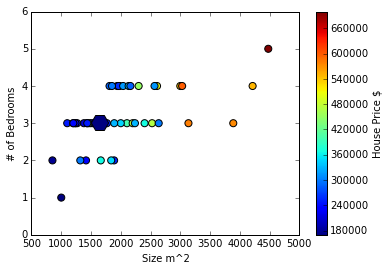

In [7]:
#Make an specific prediction

size = 1650
bedrooms = 3

inp = array([size,bedrooms])
expectedPrice = prediction(theta,inp,mu,sigma)

print 'For a size of %d and %d we expect a price of %f' %(size, bedrooms,expectedPrice) 

#Plot data to check sanity of our prediction

print 'Data is plotted to check sanity of our prediction. Predictino is shown with an hexagon.'
sc = scatter(x[:,0],x[:,1], c = y, s= 50)
scatter(size,bedrooms, c = expectedPrice, s= 300, marker = 'H')
cb = colorbar(sc)
cb.ax.set_ylabel('House Price $')
xlabel('Size m^2')
ylabel('# of Bedrooms')